# Ein einfaches epidemiologisches Modell
_Dr. Thomas Viehmann <tv@mathinf.eu>_

**Dies ist ein Entwurf, bitte nicht weiter verbreiten!**

**This is a German draft, please do not copy!**


Epidemiologie ist die Wissenschaft von der Ausbreitung von Krankheiten. Wie in vielen wissenschaftlichen Disziplinen gibt es mathematische Modelle, mit denen man versuchen kann, die Ausbreitung zu beschreiben.
Solche Modelle vereinfachen notgedrungen die Realität, dass heißt, es gibt einen _Modellfehler_, und wir kennen die einfließenden Größen nicht genau, sie unterliegen also einem _Schätzfehler_.

_Hinweis:_ Ich bin kein Epidemiologe, sondern Mathematiker und Modellierer. Ich hoffe, mit diesem Notebook ein wenig zum Verständnis für Ausbreitung von Krankheiten wie CoViD-19 beizutragen. Insbesondere sind meine Annahmen für die Parameter "aus der Luft gegriffen" und die Erklärungen allgemeinverständlich gehalten.


Eines der einfachsten Modelle ist das sogenannte [SIR-Modell](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) (englisch Susceptible to Infectious to Recovered) dass letzlich auf Kermack und McKendrick zurückgeht (eine Arbeit von 1927). Es trifft auf Krankheiten zu, gegen die der Körper eine Immunität besitzt, wenn man sie einmal hatte oder geimpft ist.

Wir stellen uns vor, dass man die Bevölkerung in drei Gruppen einteilen kann:
- Ansteckbar (also noch gesund),
- Infiziert (also krank oder ansteckend, auch ohne, dass die Krankheit ausgebrochen ist),
- Genesen bzw. Geimpft (und damit nicht mehr ansteckbar und nicht mehr gesund).

Jeder Mensch ist zu jeder Zeit in einer der drei Gruppen. Ein Übergang ist möglich von Ansteckbar zu Infiziert sowie von Infiziert zu Genesen. Wir nehmen an, dass keine anderen Übergänge möglich sind. Inbesondere sind alle geimpften direkt zum Start geimpft.

Wir nehmen an, dass es insgesamt $N$ Personen gibt (und $N$ so groß ist, dass wir in "Teilen" modellieren können).
Nach den englischen Begriffen nennen wir $S$ die Anzahl der ansteckbaren Personen, $I$ die der Infizierten, und $R$ die der Genesenen. Diese sind Funktiontionen (also für jede Zeit $t$ definiert), die wir $S(t)$, $I(t)$ und $R(t)$ nennen. Die Gesamtzahl $N$ ist unabhängig von $t$.

Ein Sachverhalt, den wir hier vernachlässigen, sind Geburten und Todesfälle (oder Umzüge etc.). Meist sind diese gering im Vergleich zur Dynamik zwischen zwischen $S$, $I$, und $R$. Damit wird unser Modell zu einem geschlossenen System, es gilt immer

$$S(t) + I(t) + R(t) = N.$$

Wir beschreiben die Geschwindigkeit der Änderungen mit Ableitungen, die wir mit $\dot S$, $\dot I$ und $\dot R$ beschreiben. Aus der Gleichung für das geschlossene System erhalten wir die Gleichgewichtsbedingung

$$\dot S(t) + \dot I(t) + \dot R(t) = 0.$$


## Ansteckung

Wir führen eine positive Zahl $\beta > 0$ ein, die angibt, an wie viele Personen, eine infizierte Person Krankheitserreger in einem relevanten Maß weitergibt. 

Wenn wir davon ausgehen, dass alle Personen aus der Gesamtheit gleich wahrscheinlich der Empfänger ist, treffen die Erreger mit Wahrscheinlichkeit $S(t) / N$ eine ansteckbare Person, die dann in den infizierten Zustand wechselt. Das dies für $I(t)$ Personen gleichzeitig passiert, ist also die Übergangsrate -- mit der die Anzahl der ansteckbaren, gesunden abnimmt -- gerade $\beta S(t)I(t) / N$, es gilt also 

$$
\dot S(t) = - \frac{\beta S(t)I(t)}{N}.
$$


## Genesung

Für die Genesung haben verschiedene Möglichkeiten. Wir könnten zum Beispiel eine Annahme darüber treffen, wie lange die Krankheit dauert. Wir machen es hier uns einfach, und führen eine Gesundungsrate $\gamma$ ein, also der Anteil der infizierten Personen, die zu jedem Zeitpunkt gesunden. Diese erhöht die Zahl Genesenen, es gilt also

$$
\dot R(t) = \gamma I(t).
$$

## Gleichung für die Infizierten

Durch Einsetzen der Gleichungen für Ansteckung und Genesung in die Gleichgewichtsbedingung erhalten wir

$$
\dot I(t) = - \dot S(t) - \dot R(t) = \left(\beta \frac{S(t)}{N} - \gamma \right) I(t).
$$

### Nebenbei: Kontinuierliche Verzinsung

Wie so oft geben wir hier Raten als Ableitungen an, auch wenn wir vielleicht eher daran gewöhnt sind, Raten von einem Zeitschritt als zum nächsten Anzusehen.
Wenn man das mit Verzinsungsprozessen vergleicht, ist dies hier das äquivalent zur kontinuierlichen Verzinsung.
Dennoch haben die Koeffizienten $\beta$ und $\gamma$ als Einheit $\frac{1}{Zeiteinheiten}$, also zum Beispiel Anzahl pro Tag.


## Invarianz gegenüber der Gesamtzahl

Wir können von absoluten Größen $S$, $I$, $R$, zu relativen Größen $s = S/N$, $i = I/N$ und $r = R/N$ übergehen,
dann sind die gleichungen, dieselben wie für $N=1$.
Aufgrund dieser Invarianz können wir auf $N=1$ übergehen und $S$, $I$ und $R$ als Anteile an der Gesamtbevölkerung ansehen. Das machen wir im Folgenden.

## Typische Krankheitsdauer

Wenn wir mit nur Kranken beginnen würden (also auch keine Kranken dazukämen), hätten wir die Gleichung

$$
\dot I(t) = - \gamma I(t),
$$

also die Gleichung für einen exponentiellen Zerfall. Deren Lösung ist

$$
I(t) = I(0) exp(- \gamma t).
$$

Wir können das startend von einer infizierten Person graphisch darstellen:

In [75]:
import torch
%matplotlib inline
from matplotlib import pyplot
import math

(tensor(2.1212), tensor(0.6543))

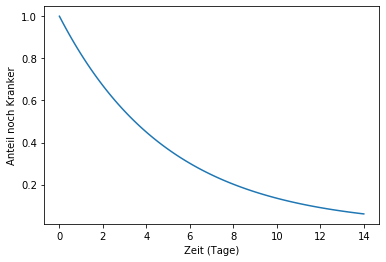

In [17]:
gamma = 0.2  # komplett ausgedacht(!)
t = torch.linspace(0, 14)
I = torch.exp(-gamma * t)
pyplot.plot(t, I)
pyplot.xlabel("Zeit (Tage)")
pyplot.ylabel("Anteil noch Kranker")
t[15], I[15]

Lesen wir auf der $x$-Achse die Zeit ab (z.B. in Tagen), dann sehen wir auf der y-Achse der Anteil noch kranker Personen: Nach 2 Tagen sind noch ca. 65% der zum Start infizierten Personen krank.

Wir können aber die Fläche unter dem Graphen gedanklich in horizontale Linien aufteilen. Dann erhalten wir Krankheitsdauern. 65% der zum Start infizierten haben eine Krankheitsdauer von mindestens 2 Tagen.
Damit ist die Fläche unter dem Graphen die durchschnittliche Krankheitsdauer $T_I$. Wir können sie als Integral ausrechnen:

$$
T_I = \int_0^\infty \exp(-\gamma t) dt = - \frac{1}{\gamma} \exp(-\gamma t) \big|_{t=0}^\infty = \frac{1}{\gamma}.
$$

Wollen wir also die Annahme für die Genesungsrate $\gamma$ aus der Krankheitsdauer ableiten, ist also der Kehrwert der durchschnittlichen Krankheitsdauer $\gamma = 1/T_I$. (Wir machen aber mit dem Modell _auch_ eine strukturelle Annahme.)

## Die Basisreproduktionszahl

Wenn wir davon ausgehen, dass die Weitergabe der Krankheitserreger mit der Rate $\beta$ erfolgt und die Infektion $T_I$ Tage andauert, dann hat jeder Kranke $R_0 = \beta T_I = \frac{\beta}{\gamma}$ "Infektionskontakte" (wenn die Kontakte alle in $S$ wären, wären es Ansteckungen. Diese Zahl ist immens wichtig und hat daher den Nahmen Basisreproduktionszahl oder Grundvermehrungsrate.

Man kann sich überlegen, dass wenn man $\beta$ und $\gamma$ um denselben Faktor multipliziert, dass eine "Zeitskalierung" gleichkommt: Verdoppelt man beide, läuft alles doppelt so schnell ab, d.h. man hat zu $t$ dieselben werte wie zuvor in $2t$. Wir werden sehen, dass die Form des Verlaufs -- insbesondere das Maximum an Infektionen -- wesentlich von der Basisreproduktionszahl $R_0$ abhängen.

Eine Sache, die man leicht sieht, ist, dass für $R_0 < 1$ die Ableitung von $I$ stets negativ ist (weil $S/N < 1$). Die Anzahl der Infizierten nimmt in diesem Fall sofort ab, es ist dann also -- in diesem Modell und im Sinne der Epidemiologie -- alles unter Kontrolle.

Auf der englischen Wikipedia gibt der [Artikel zur Basisreproduktionszahl](https://en.wikipedia.org/wiki/Basic_reproduction_number) für einige krankheiten Schätzer an, für CoViD-19 wird sie auf zwischen $1.4$ und  $3.9$ geschätzt. Wir kommen darauf aber nochmal zurück.

## Das Maximum der Anzahl der Infizierten

Eine sehr wichtige Frage ist, wieviele infizierte Personen es maximal gleichzeitig gibt. Davon hängt, wenn man annimmt, dass z.B. 5% der Kranken eine intensivmedizinische Behandlung benötigt, zum Beispiel ab, ob das medizinische System überlastet wird. Sobald $5\% \max I > Kapazität$, ist die Not groß (andere Faktoren spielen auch eine Rolle, die Kapazität ist zum Beispiel nicht konstant).

Wir nehmen für die Basisreproduktionszahl $R_0 > 1$ an (siehe oben für $R_0 < 1$).

Bestimmen wir also das Maximum der gleichzeitig Infizierten $I_{max}$. Man kann zeigen, dass dieses Maximum angenommen wird, wir nennen den Zeitpunkt, zu dem dies geschiet $t^*$.
Dies können wir nicht direkt bestimmen, sondern bestimmen zunächst $S(t^*)$ und $R(t^*)$ und nutzen dann wieder
die Gleichung $S+I+R = 1$ des geschlossenen Systems. (Wir erinnern uns, dass wir $N=1$ annehmen.)

Dieses ist der vielleicht mathematisch anspruchsvollste Abschnitt, man kann ihn auch überspringen und nur das Ergebnis anschauen.

### Anzahl $S(t^*)$ der Ansteckbaren am Maximalpunkt für $I$

Dies ist der Fall, wenn die Veränderung der Zahl der Infizierten gerade ihr Vorzeichen von positiv zu negativ ändert bzw. wenn die Ableitung $\dot I(t) = 0$. Für $\dot I(t)$ haben wir eine Gleichung, also gilt an $t^*$
$$
0 = \dot I(t^*) = \left(\beta S(t^*) - \gamma \right) I(t^*).
$$

Da aber $I > 0$ (andernfalls gibt es keine Infizierten) folgt
$$
0 = \beta S(t^*) - \gamma
$$
oder
$$
S(t^*) = \gamma / \beta.
$$

Damit haben wir $S(t^*)$ bestimmt.

### Zusammenhang zwischen den Zahlen der Ansteckbaren $S$ und Genesenen $R$

Um $R(t^*)$ zu bestimmen, können wir einen Zusammenhang zwischen den 
Zahlen der Ansteckbaren $S$ und Genesenen $R$ herstellen.
Dazu eliminieren wir $I$ aus den Gleichungen für $\dot S$ und $\dot R$.

Lösen wir die Gleichungen für $S$ und $R$ nach $I$ auf und setzen sie gleich, so erhalten wir
$$\dot S / (-\beta S) = \dot R / \gamma$$

oder, wenn wir den Quotienten $\dot S/S$ als Ableitung des Logarithmus schreiben,
$$
\dot {(\ln S)} = \dot S / S = -\frac{\beta}{\gamma} \dot R.
$$

Die Methode der [Trennung der Veränderlichen](https://de.wikipedia.org/wiki/Trennung_der_Veränderlichen) lässt uns nun auf beiden seiten in der Zeit integrieren:

$$
\ln S(t) - \ln S(0) = -\frac{\beta}{\gamma} (R(t) - R(0))
$$
und das Exponential ist
$$
S(t) = S(0) \exp \left( -\frac{\beta}{\gamma}{(R(t) - R(0))}\right)
$$

### Anzahlen $R(t^*)$ der Genesenen und $I(t^*)$ am Maximalpunkt für $I$

Wenn also $S(t^*) = \frac{\gamma}{\beta}$, $R(0) \approx 0$  und $S(0) \approx 1$, so ist
$$
R(t^*) = R(0) -\frac{\gamma}{\beta} (\ln S(t_{crit} - \ln S(0))
            \approx -\frac{\gamma}{\beta} \ln \frac{\gamma}{\beta}
$$
und
$$I_{max} = I(t^*) = 1 - S(t^*) - R(t^*) \approx 1-\frac{\gamma}{\beta} (1-\ln \frac{\gamma}{\beta} )$$


### Das Maximum der gleichzeitig Infizierten in Abhängigkeit der Basisreproduktionszahl

Wie wir sehen, hängt das (approximative) Maximum unter der Annahme, dass anfangs fast die gesamte Population ansteckbar und (dann ja auch gegeben) nahezu keiner genesen ist, nur von der Basisreproduktionszahl ab und zwar als
$$
I_{max} \approx 1-\frac{1}{R_0} (1 + \ln R_0).
$$
Wir können diesen Zusammenhang graphisch darstellen:

1.1515151262283325

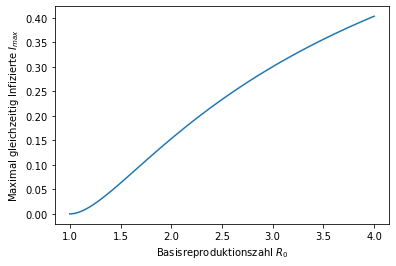

In [100]:
R0 = torch.linspace(1.0, 4.0)
Imax = 1-1/R0*(1+torch.log(R0))
pyplot.plot(R0, Imax)
pyplot.xlabel('Basisreproduktionszahl $R_0$')
pyplot.ylabel('Maximal gleichzeitig Infizierte $I_{max}$')
R0[(Imax-0.01).abs().argmin()].item() # Kritisches R_0, siehe unten

## Schussfolgerungen

*Unter den Annahmen des Modells* (eine entscheidende Einschränkung) steigt das Maximum der Anzahl der gleichzeitig Infizierten $I(t^*)$ sehr stark mit zunehmender Basisreproduktionszahl $R_0$.

Wenn man davon ausgeht, dass es in Deutschland ca [25.000 Intensivbetten gibt](https://www.aerzteblatt.de/nachrichten/111029/Ueberlastung-deutscher-Krankenhaeuser-durch-COVID-19-laut-Experten-unwahrscheinlich) das sind ca. 3 pro 10000 Einwohner. Nehmen wir an, die Hälfte davon, also 1.5 pro 100000 Einwohner, stünde für CoViD-Patienten mit kritischen Verläufen zur Verfügung. Ferne seien 1.5% aller Verläufe kritisch (das ist [relativ zu den geschätzten 5% in China (untere Grafik rechts unter Diagrams)](https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic#Signs_and_symptoms) eine eher zu geringe Annahme, aber ggf. sind kritische Fälle auch nur zeitweise kritisch, ich weiß es nicht). Dann würde eine maximale Infektionsrate von $\frac{1.5}{10000} / 1.5\% = 1\%$ kritisch. Im Modell korrespondiert dies zu $R_0 \approx 1.15$, weit weniger als die Spanne von 1.4 - 3.9.

Was also tun?

### Auswirkung frühzeitiger Erkennung und Isolation der bekannten Fälle

Es scheint, als sei dies in Hongkong, Singapur, Südkorea und Taiwan funktioniert.
Bayern hat es am 16. März aufgegeben, weil die Infektionsketten vollkommen unklar sind.

Eine spekulative Anmerkung: Eine wichtige Rolle scheinen (Ski-) Urlaube als Quelle und die Schulen als Übertragungswege gespielt zu haben. Jedenfalls spricht folgendes Zahlenverhältnis aus meiner Sicht dafür: Am 12.3. Tag vor der bekanntgabe der allgemeinen Schulschließung gab es 500 bekannte Fälle und 125 Schulschließungen aufgrund mindestens einem bekannten Fall an den jeweiligen Schulen. Schüler nach den Ferien eine Woche in die Schule gehen zu lassen und dann (erst) unter Quarantäne zu Stellen, wie im Fall von Südtirolurlaubern geschehen, ist vermutlich nicht optimal gewesen.

Wie würde sich als (grob) eine frühzeitige Erkennung auswirken?
Ist die Kranheitsdauer $T_I$, man diagnostiziert aber schon nach $T_D$ Tagen und erfolgreich isoliert, steckt jeder Kranke nur noch $\tilde R_0 = \beta T_D$ statt $R_0 = \beta T_I$ an.

Wenn wir $I$ als Anteil der nicht-diagnostiziert Infizierten umwidmen, können wir mit diesem niedrigeren $\tilde R_0$ bzw. $\tilde \gamma = 1/T_D$ rechnen. Es gibt dann $\frac{T_I}{T_D} I$ Infizierte, von denen $I$ nicht diagnostiziert sind.

### Allgemeine Isolation

Nun versuchen wir also, wie andere Länder auch, durch Reduktion der Kontakte insgesamt eine Reduktion zu erzielen.
Im Modell könnte man annehmen, dass eine Reduktion der Kontakte um einen bestimmten Faktor dieselbe Reduktion in $\beta$ bzw. $R_0$ erzielt. Nur, wie einfach ist es, Kontakte um einen Faktor 3 bis 4 zu reduzieren?

Wir werden es sehen, hoffen wir das beste.


## Grenzen des Modells

Es gibt einige Fragen, die das Modell nicht beantworten kann:

Welcher Anteil der Bevölkerung wird erkranken? Im Modell steckt (bei $R_0 > 1$) die implizite Annahme, dass die gesamte Bevölkerung im laufe der Zeit erkrankt. Das bedeutet, dass man fragen muss, ob $R_0$ veränderlich ist (das ist ja auch in den Maßnahmen letztlich das Ziel) und unter $1$ gedrückt werden kann.

Einige Auslassungen schmälern die Aussagekraft des Modells nicht: Das Modell beinhaltet keine krankheitsbedingte Sterblichkeit. Kennt man aber die Sterblichkeitsrate $q$, gibt es (bis auf zeitliche Ungenauigkeit) $q R$ Todesfälle und $(1-q) R$ Genesene. Ähnlich funktioniert ja auch die obige überlegung zum Nutzen umfassender Verfolgung der Fälle.

Auch kann man das Modell aufgrund der impliziten Annahmen hinterfragen:
- Dem Modell fehlt die räumliche Dimension. Insbesondere ist die Ansteckung unabhängig von der räumlichen Entfernung von Individuen jenseits der mittelbaren Auswirkung über $\beta$ bzw. $R_0$.
- Eine Dunkelziffer ist nicht vorgesehen. Jenseits sehr pauschaler Annahmen ist sie auch schwer einzubauen. Vermutlich ist es auch deshalb schwierig, das Modell an Fallzahlen zu kalibrieren.
- Die stochastische Dimension wird nicht beachtet. Das ist für ein so grobes Modell wie dieses vermutlich unerheblich, ist dies aber gegebenenfalls für verfeinerte Modelle (z.B. mit räumliche Dimension, Dunkelziffer) könnte es aber eine größere Rolle spielen.

Hier kommen wir wieder an einen Punkt, bei dem ich darauf hinweisen muss, dass ich kein Epidemiologe bin.

### Anhang: Numerische Lösung der Gleichungen in Python

Wir können die Gleichungen numerisch lösen
Dafür gehen approximieren wir die Ableitungen mit Differenzenquotienten mit einem Zeitschritt $\tau$, also zum Beispiel

$$
\dot S(t) \approx \frac{S(t + \tau) - S(t)}{\tau}.
$$

Damit ergeben sich die Vorschriften (wieder rechnen wir $I(t)$ durch das geschlossene System aus).

$$
S(t + \tau) = S(t) - \tau \beta \frac{S(t) I(t)}{N},
$$
$$
R(t + \tau) = R(t) + \tau \gamma I(t)
$$
und
$$
I(t + \tau) = N - S(t + \tau) - R(t + \tau).
$$

Diese Approximation heißt explizites Euler-Verfahren zur Lösung des Systems von Differentialgleichungen.
Wir können sie programmieren:

In [80]:
N = 100000
I_0 = 10
T = 100
beta = 0.45
gamma = 0.1

tau = 0.01

t = torch.arange(0, T, tau)
S = torch.full_like(t, N - I_0)
I = torch.full_like(t, I_0)
R = torch.zeros_like(t)

for i in range(t.size(0) - 1):
    S[i + 1] = S[i] - tau * beta * I[i] * S[i] / N
    R[i + 1] = R[i] + tau * gamma * I[i]
    I[i + 1] = N - S[i + 1] - R[i + 1]

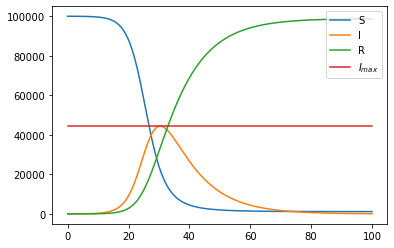

In [86]:
pyplot.plot(t, S, label="S")
pyplot.plot(t, I, label="I")
pyplot.plot(t, R, label="R")
pyplot.plot([t[0], t[-1]], 2*[(1-gamma/beta*(1-math.log(gamma/beta)))*N], label="$I_{max}$")
pyplot.legend(loc="upper right")